<a href="https://colab.research.google.com/github/prateekrao/Breast-Cancer-Detection/blob/main/model-87%25-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/split-data.zip"

In [32]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt


In [4]:
gen = ImageDataGenerator(
    rescale = 1/255
)

In [39]:
train_set = gen.flow_from_directory(
    directory = "/content/split-data/train",
    class_mode = 'sparse',
    color_mode = 'rgb',
    target_size = (128,128),
    shuffle = True,
)

Found 194266 images belonging to 2 classes.


In [40]:
test_set = gen.flow_from_directory(
    directory = "/content/split-data/test",
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'sparse',
    shuffle = False
)

Found 41629 images belonging to 2 classes.


In [41]:
validation_set = gen.flow_from_directory(
    directory = '/content/split-data/valid',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'sparse',
    shuffle = False
)

Found 41629 images belonging to 2 classes.


In [44]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3),  activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3),  activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(Conv2D(1024, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(1024, (3,3), activation='relu'))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu', kernel_regularizer=l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.0001)))
model.add(Dense(2, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 58, 58, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 27, 27, 512)      

In [46]:
opt = Adam(lr = 1e-05)

model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
history = model.fit(train_set, validation_data=validation_set, batch_size = 128, epochs = 10, shuffle = True)

Epoch 1/10
6071/6071 [==============================] - 623s 102ms/step - loss: 8.2382 - accuracy: 0.7844 - val_loss: 2.1735 - val_accuracy: 0.8257
Epoch 2/10
6071/6071 [==============================] - 617s 102ms/step - loss: 1.5798 - accuracy: 0.8301 - val_loss: 0.7057 - val_accuracy: 0.8397
Epoch 3/10
6071/6071 [==============================] - 616s 102ms/step - loss: 0.6374 - accuracy: 0.8414 - val_loss: 0.4835 - val_accuracy: 0.8514
Epoch 4/10
6071/6071 [==============================] - 616s 101ms/step - loss: 0.4761 - accuracy: 0.8466 - val_loss: 0.4326 - val_accuracy: 0.8475
Epoch 5/10
6071/6071 [==============================] - 616s 102ms/step - loss: 0.4144 - accuracy: 0.8564 - val_loss: 0.3806 - val_accuracy: 0.8619
Epoch 6/10
6071/6071 [==============================] - 617s 102ms/step - loss: 0.3872 - accuracy: 0.8591 - val_loss: 0.3649 - val_accuracy: 0.8663
Epoch 7/10
6071/6071 [==============================] - 617s 102ms/step - loss: 0.3687 - accuracy: 0.8640 - val_

In [48]:
model.evaluate(test_set)

1301/1301 [==============================] - 40s 31ms/step - loss: 0.3341 - accuracy: 0.8735


[0.334098756313324, 0.8734536170959473]

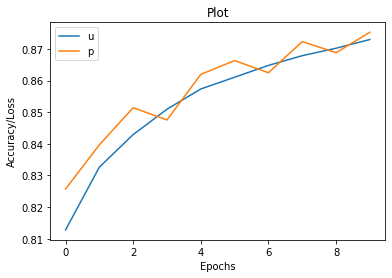

In [49]:
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")

plt.ylabel("Accuracy/Loss")
plt.xlabel("Epochs")
plt.title("Plot")
plt.legend("upper left")

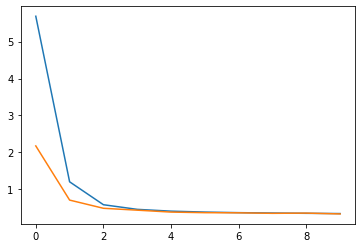

In [50]:
plt.plot(history.history['loss'], label= "Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")


In [51]:
model.save("/content/drive/MyDrive/new-model-87.h5")